# Setup

In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the appropriate libraries for plotting  OpenStreetMap

!apt install libspatialindex-dev
!pip install osmnx
!pip install matplotlib==3.1.3
!pip install contextily

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (474 kB/s)
Selecting previously unselected package libspatialindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
# Install the appropriate libraries for plotting openstreetmap

import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import pandas as pd
import glob
import os
from pathlib import Path
import numpy as np
from datetime import *
%matplotlib inline


# Purple Air

In [ ]:
!pip install mapclassify
import mapclassify
import pytz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#All Means
directory = '/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/purpleair/41860/2021/'

# New dataframes
month_strs = [] # Store months
hour_strs = [] # Store hours
all_hours = []
all_hours_one_month = [] # Store means of hours
all_values=[] # Store mean values for each hour for each month 

# Loop through hours
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs.append(hour_str)

# Loop through months
for month in range(13):
  month_str = str(month)
  if month < 10:
    month_str = '0' + str(month)
  month_strs.append(month_str)
month_strs.remove("00")

for month in month_strs:
  all_hours_one_month = [] # Store means of hours
  directory_= directory + month + "/"
  
  for i in hour_strs:
    hour_pm_all_stations=[]
    for filename in os.listdir(directory_):
      # Read in data and loop through
      f = os.path.join(directory_ + filename)
      data = pd.read_csv(f)

      #Convert from UTC Time to local time
      data=data.set_index(pd.DatetimeIndex(data.datetime))
      pacific = pytz.timezone('America/Los_Angeles')
      data["Converted Time"] = data.index.tz_localize(pytz.utc).tz_convert(pacific).strftime('%Y-%m-%d %H:%M:%s')

      pm_per_hour = data.loc[data["Converted Time"].str.contains(i+ ":00") ] # Extract rows matching each hour
      col_pm = pm_per_hour[pm_per_hour.columns[-2]] #Take the PM value
      hour_pm_all_stations.append(col_pm.values)
    flatten=np.concatenate(hour_pm_all_stations)
    mean_of_hour=np.nanmean(flatten) # Find the mean of the PM values
    all_hours_one_month.append(mean_of_hour) # Append the mean value to a dataframe
  all_values.append(all_hours_one_month)
print(all_values)

KeyboardInterrupt: ignored

In [ ]:
all_values

[[12.070106170027788,
  11.320454453711442,
  10.836745258868211,
  10.702474657837351,
  10.521707062207087,
  10.31782593910372,
  9.976459627599649,
  9.84238180356209,
  10.320804097910791,
  10.834509989133418,
  10.465144627716992,
  9.72051323533496,
  8.873743320759212,
  8.056488235723746,
  7.491943007754282,
  7.207035731592468,
  7.4138813406888255,
  8.783978723046737,
  11.023820291774072,
  12.787701754898546,
  13.70615399704116,
  13.801211410791566,
  13.342476010847674,
  12.476515644488162],
 [4.8415621425032676,
  4.342249704807495,
  3.953873160108167,
  3.7238581314426065,
  3.598863158005139,
  3.6001850226348346,
  3.7610406400714256,
  4.14011958801114,
  4.545626153536251,
  4.645833305021171,
  4.441302327444353,
  4.123112435106157,
  3.7980842397946404,
  3.3502047068076206,
  2.9929432339560615,
  2.8867421806810736,
  3.013410736646256,
  3.611368176048312,
  4.955169082026812,
  5.895956858092302,
  6.145305104681232,
  6.141415007721279,
  5.8576196313

In [ ]:
pm_per_hour

In [ ]:
# open file in write mode
with open(r'/content/drive/MyDrive/Colab Notebooks/Data/values', 'w') as fp:
    for item in all_values:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


Text(0.5, 1.0, 'PM2.5 Series Plot')

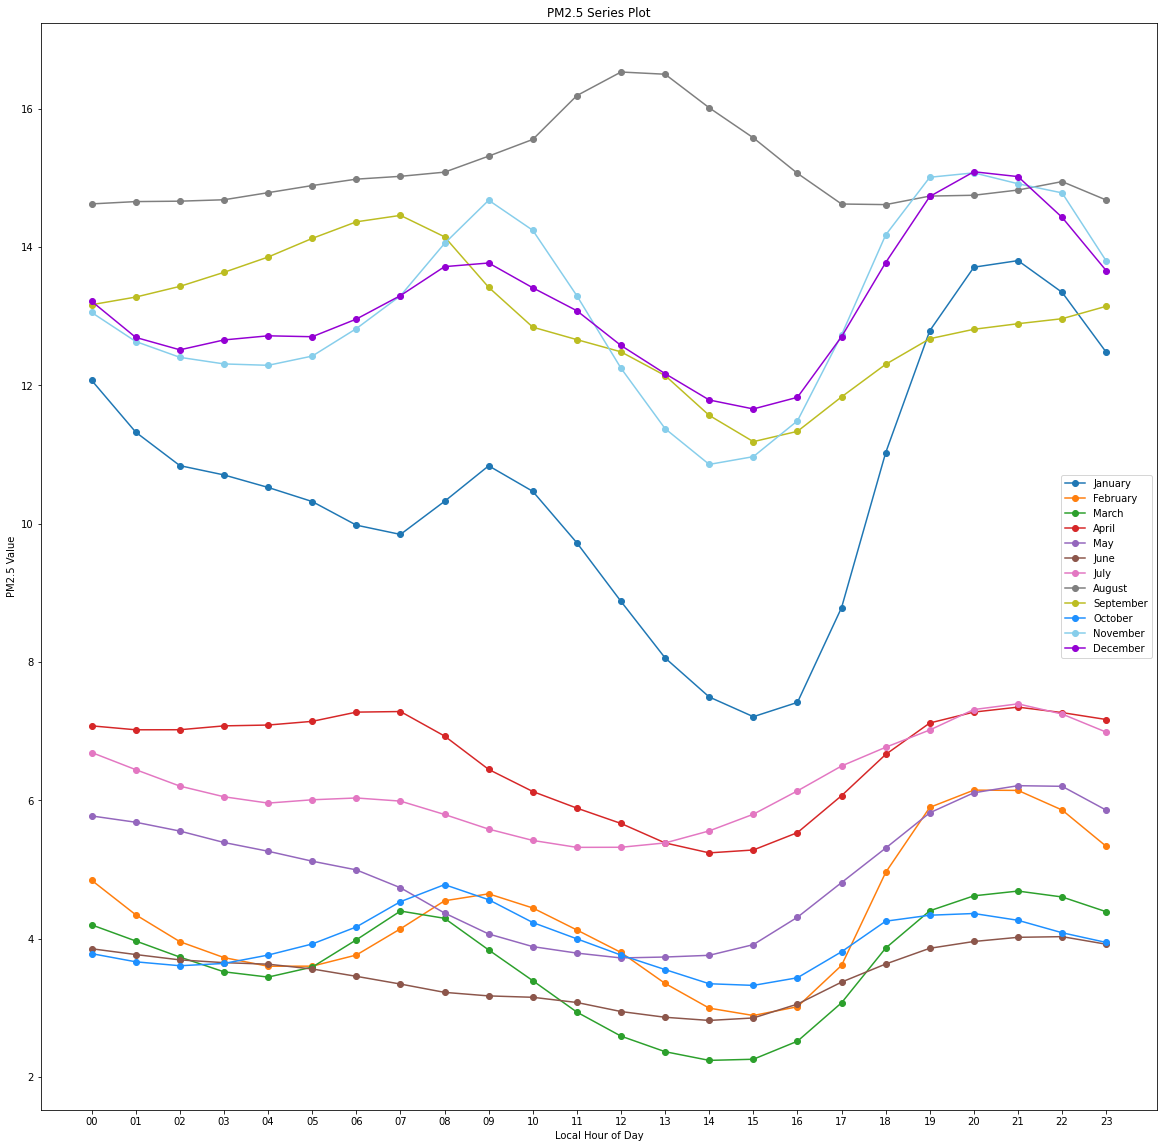

In [ ]:
# Plot all means

hour_strs = [] # Store hours

for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs.append(hour_str)


plt.rcParams["figure.figsize"] = (20,20)

jan_means=[12.070106170027788, 11.320454453711442, 10.83674526, 10.70247466,
           10.52170706,	10.31782594,	9.976459627599649,	9.84238180356209,
           10.320804097910791	,10.834509989133418, 10.465144627716992,	9.72051323533496,
           8.873743320759212,	8.056488235723746, 7.491943007754282, 7.207035731592468,
           7.4138813406888255,8.783978723046737,	11.023820291774072,	12.787701754898546,
           13.70615399704116,	13.801211410791566, 13.342476010847674,	12.476515644488162]

feb_means= [ 4.8415621425032676, 4.342249704807495, 3.953873160108167, 3.7238581314426065, 
            3.598863158005139, 3.6001850226348346, 3.7610406400714256, 4.14011958801114, 
            4.545626153536251, 4.645833305021171, 4.441302327444353, 4.123112435106157, 
            3.7980842397946404, 3.3502047068076206, 2.9929432339560615, 2.8867421806810736,
            3.013410736646256, 3.611368176048312, 4.955169082026812, 5.895956858092302, 
            6.145305104681232, 6.141415007721279, 5.857619631303353, 5.332588711048214]

march_means=[4.196986671796335, 3.963921632487234, 3.731202462939581, 3.5183664232255105, 
             3.4420296436668196, 3.5862160186939356, 3.9809017161668785, 4.3971073713027815, 
             4.291816448937698, 3.8344330339374446, 3.3901058818689567, 2.9356407939606415, 
             2.588321646579088, 2.363471698885706, 2.2378340126721463, 2.2542477204391953,
             2.515045034431519, 3.0704332570644337, 3.8613052572396716, 4.4007868116700175, 
             4.6170109562307085, 4.685829467804159, 4.600539230365544, 4.3871788439038975]

april_means=[7.07463124736316, 7.017621384409286, 7.0184820455548, 7.074396822797987, 
             7.086309536470572, 7.139721653405293, 7.2731129423537, 7.281614303946343, 
             6.927185758335763, 6.444529730842029, 6.125184551482816, 5.88492125140043, 
             5.663357721104011, 5.381814438070846, 5.238068915956327, 5.27992332338127,
             5.531007211756658, 6.065154333485314, 6.660949585787963, 7.115977078970354,
             7.273734765197477, 7.345337271652392, 7.26618334618685, 7.166344208052076]

may_means=[5.7719430445279025, 5.680901628136127, 5.553286400172368, 5.388186020782227, 
           5.261640106860333, 5.117811291278463, 4.992080032892129, 4.733719215524777,
           4.367846114372224, 4.06525376605471, 3.8826807780331163, 3.788788155431244, 
           3.7189806649247186, 3.732264060646071, 3.7569016464497507, 3.911437187617879,
           4.3076185462696435, 4.808843990409851, 5.307134677856792, 5.817529453287228, 
           6.107047549596536, 6.209511942300171, 6.200444634589586, 5.8558210747499215]

june_means= [3.851692809558982, 3.767989944052649, 3.690699847860357, 3.650976990822743, 
             3.6287156918632295, 3.559585161924127, 3.453158111080569, 3.341479352567633,
             3.2213534051064916, 3.1701454795698294, 3.1500277330406456, 3.074925540753333,
             2.9440905428405553, 2.861179103368896, 2.815359220108837, 2.8512695279140368,
             3.051395808910413, 3.3696373332352207, 3.631158172652509, 3.858658043452234,
             3.9567746286974623, 4.017142959718251, 4.026773412522685, 3.9174967085914196,]

july_means= [6.689063019530089, 6.440923632467343, 6.203282599014249, 6.049228604560502, 
              5.957839028647745, 6.005764954414368, 6.031885058201839, 5.986544791745789, 
              5.79303126425023, 5.581633392940284, 5.417843503356959, 5.317796294038652, 
              5.31915190373234, 5.38187246463175, 5.555783970041539, 5.796661761443182,
             6.134476847057329, 6.494313147978711, 6.765058384031813, 7.0148637836230545, 
              7.310579736624345, 7.392830280541144, 7.245218737425335, 6.98366474406256, ]

august_means=[14.621273258571826, 14.65463312293133, 14.660699113230057, 14.681065491852138, 
              14.78361680479596, 14.88662081943576, 14.979118582120421, 15.01996909228497, 
              15.080395169332, 15.31209446143211, 15.553593074348074, 16.187462468948144, 
              16.528081808649958, 16.49602469457097, 16.010673729574208, 15.576478357963438,
              15.06310263715135, 14.619671739685769, 14.610942872081273, 14.734292843107296,
              14.746270257961175, 14.821727969484835, 14.943823098947988, 14.677381914484057]

september_means=[13.16373481341564, 13.274377238442211, 13.428802451655995, 13.631842288795628,
                 13.85311820485525, 14.122455774717913, 14.362065611219597, 14.455193415485033, 
                 14.145277124201508, 13.415319854510479, 12.839270508381718, 12.658630594727295, 
                 12.482075146344187, 12.139404013098845, 11.563476223948348, 11.183857033140571,
                 11.332749726626911, 11.831075101156804, 12.301687929585492, 12.67206923863458,
                 12.808501417531255, 12.88910583092226, 12.961253783483642, 13.140980160719732,]


october_means=[3.7809655787542082, 3.6629585571476153, 3.6061366454339674, 3.6393700862421072,
               3.760499070434863, 3.920899543762833, 4.167372718602453, 4.532612546101339, 
               4.778721205975646, 4.560885102394684, 4.231093726243828, 3.9949414622420676, 
               3.760293961785964, 3.5506845289413254, 3.3458982770556203, 3.322113089479597,
               3.4323756514758688, 3.8085584429650154, 4.250268141697225, 4.336637407267846, 
               4.361427172401231, 4.263206242500138, 4.083227037958277, 3.942969986960686,]


november_means= [13.051252419617642, 12.63149902024991, 12.402777997011986, 12.307533956654222,
                 12.287511036272933, 12.420949187095747, 12.818157449789135, 13.292755553003051,
                 14.049841308454884, 14.674244425473962, 14.23958569052846, 13.292878975352766, 
                 12.245413857729341, 11.371567247233099, 10.85477015102767, 10.96676986364984,
                 11.484771848734448, 12.727105442588268, 14.17233090417885, 15.006448460323835,
                 15.070074841853922, 14.912676509884045, 14.780255595376184, 13.796135557363154]


december_means= [13.21257142907452, 12.690591207028758, 12.511452583558754, 12.654361413667635, 
                 12.71395926207177, 12.700824300144538, 12.955926656575713, 13.295560397524705, 
                 13.714077883002638, 13.76685209650199, 13.40814850291761, 13.076152569931915, 
                 12.573988419636793, 12.166862126719192, 11.786142446608451, 11.656445278761868,
                 11.824823824675812, 12.701388082620134, 13.772794403217704, 14.728705486913292,
                 15.086089007410884, 15.015993520438116, 14.426421908002665, 13.656490953198507,]




plt.plot(hour_strs,jan_means,  marker='o', label="January")
plt.plot(hour_strs,feb_means, marker='o', label="February")
plt.plot(hour_strs,march_means, marker='o', label="March")
plt.plot(hour_strs,april_means, marker='o', label="April")
plt.plot(hour_strs,may_means, marker='o', label="May")
plt.plot(hour_strs,june_means, marker='o', label="June")
plt.plot(hour_strs,july_means, marker='o', label="July")
plt.plot(hour_strs,august_means, marker='o', label="August")
plt.plot(hour_strs,september_means,marker='o', label="September")
plt.plot(hour_strs,october_means, marker='o', color="dodgerblue",label="October")
plt.plot(hour_strs,november_means, marker='o',color= "skyblue", label="November")
plt.plot(hour_strs,december_means, marker='o',color="darkviolet",label="December")
plt.legend()


# Add labels and title to plot
plt.xlabel("Local Hour of Day")
plt.ylabel("PM2.5 Value")
plt.title("PM2.5 Series Plot")

      #Convert from UTC Time to local time
      #data=data.set_index(pd.DatetimeIndex(data.datetime))
      #pacific = pytz.timezone('America/Los_Angeles')
      #data["Converted Time"] = data.index.tz_localize(pytz.utc).tz_convert(pacific).strftime('%Y-%m-%d %H:%M:%s')


# EPA


In [ ]:
# All
directory = "/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/airnow/"

# New dataframes
hour_strs_EPA = [] # Store hours
month_strs_EPA = [] # Store months
all_hours_one_month_EPA = [] # Store means of hours
hour_pm_all_stations_EPA=[]
all_values_EPA=[] # Store mean values for each hour for each month 

# Loop through hours
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs_EPA.append(hour_str)

# Loop through months
for month in range(13):
  month_str = str(month)
  if month < 10:
    month_str = '0' + str(month)
  month_strs_EPA.append(month_str)
month_strs_EPA.remove("00")

for month in month_strs_EPA:
  all_hours_one_month_EPA = [] # Store means of hours

  for i in hour_strs_EPA:
    for filename in os.listdir(directory):
      # Read in data and loop through
      f = os.path.join(directory + filename)
      data = pd.read_csv(f)
      california = data.loc[data['State Name'].str.contains("California")] # Extract rows for California 
      month_EPA= california.loc[california["Date Local"].str.contains("2021-" + month)] # Extract rows by month

      pm_per_hour_EPA = month_EPA.loc[month_EPA["Time Local"].str.contains(i +":00") ]  # Extract rows matching each hour
      col_pm_EPA = pm_per_hour_EPA[pm_per_hour_EPA.columns[13]] #Take the PM value
      hour_pm_all_stations_EPA.append(col_pm_EPA.values)
    flatten=np.concatenate(hour_pm_all_stations_EPA)
    mean_of_hour_EPA=np.nanmean(col_pm_EPA) # Find the mean of the PM values
    all_hours_one_month_EPA.append(mean_of_hour_EPA) # Append the mean value to a dataframe
  all_values_EPA.append(all_hours_one_month_EPA)


ParserError: ignored

In [ ]:
# All
directory = "/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/airnow/hourly_88101_2021.csv"

# New dataframes
hour_strs_EPA = [] # Store hours
month_strs_EPA = [] # Store months
all_hours_one_month_EPA = [] # Store means of hours
hour_pm_all_stations_EPA=[]
all_values_EPA_2=[] # Store mean values for each hour for each month 

# Loop through hours
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs_EPA.append(hour_str)

# Loop through months
for month in range(13):
  month_str = str(month)
  if month < 10:
    month_str = '0' + str(month)
  month_strs_EPA.append(month_str)
month_strs_EPA.remove("00")

for month in month_strs_EPA:
  all_hours_one_month_EPA = [] # Store means of hours

  for i in hour_strs_EPA:
    data = pd.read_csv(directory)
    san_fran = data.loc[(data['County Name'] == "San Francisco") | (data['County Name'] == "San Mateo")| (data['County Name'] == "Marin")| (data['County Name'] == "Sonoma")| (data['County Name'] == "Solano") | (data['County Name'] == "Contra Costa")| (data['County Name'] == "Alameda") ]# Extract rows for SF Metro
    month_EPA= san_fran.loc[san_fran["Date Local"].str.contains("2021-" + month)] # Extract rows by month

    pm_per_hour_EPA = month_EPA.loc[month_EPA["Time Local"].str.contains(i +":00") ]  # Extract rows matching each hour
    col_pm_EPA = pm_per_hour_EPA[pm_per_hour_EPA.columns[13]] #Take the PM value
    hour_pm_all_stations_EPA.append(col_pm_EPA.values)
  flatten_EPA=np.concatenate(hour_pm_all_stations_EPA)
  mean_of_hour_EPA=np.nanmean(flatten_EPA) # Find the mean of the PM values
  all_hours_one_month_EPA.append(mean_of_hour_EPA) # Append the mean values to a dataframe
all_values_EPA_2.append(all_hours_one_month_EPA)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# All
directory = "/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/airnow/"
options=["San Francisco", "San Mateo", "Marin", "Sonoma", "Solano", "Contra Costa", "Alameda"]

# New dataframes
hour_strs_EPA = [] # Store hours
month_strs_EPA = [] # Store months
all_hours_one_month_EPA = [] # Store means of hours
hour_pm_all_stations_EPA=[]
all_values_EPA_2=[] # Store mean values for each hour for each month 

# Loop through hours
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs_EPA.append(hour_str)

# Loop through months
for month in range(13):
  month_str = str(month)
  if month < 10:
    month_str = '0' + str(month)
  month_strs_EPA.append(month_str)
month_strs_EPA.remove("00")

for month in month_strs_EPA:
  all_hours_one_month_EPA = [] # Store means of hours

  for i in hour_strs_EPA:
    for filename in os.listdir(directory):
      # Read in data and loop through
      f = os.path.join(directory + filename)
      data = pd.read_csv(f)
      california = data.loc[data['State Name'].str.contains("California")] # Extract rows for California 
      month_EPA= california.loc[california["Date Local"].str.contains("2021-" + month)] # Extract rows by month

      pm_per_hour_EPA = month_EPA.loc[month_EPA["Time Local"].str.contains(i +":00") ]  # Extract rows matching each hour
      col_pm_EPA = pm_per_hour_EPA[pm_per_hour_EPA.columns[13]] #Take the PM value
      hour_pm_all_stations_EPA.append(col_pm_EPA.values)
    flatten=np.concatenate(hour_pm_all_stations_EPA)
    mean_of_hour_EPA=np.nanmean(flatten) # Find the mean of the PM values
    all_hours_one_month_EPA.append(mean_of_hour_EPA) # Append the mean value to a dataframe
  all_values_EPA_2.append(all_hours_one_month_EPA)
  


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
all_values_EPA_2

[[13.448753246753245,
  12.901392503904216,
  12.284461218115565,
  11.750152865413385,
  11.295403196418347,
  10.945879800390541,
  10.688580890013395,
  10.52672180793904,
  10.460907853190811,
  10.391761511955728,
  10.302061733092362,
  10.180172093734303,
  10.011140492531288,
  9.834961545676235,
  9.671024747359755,
  9.524763531266421,
  9.417938176197836,
  9.409981316050681,
  9.526183990375973,
  9.706299336704538,
  9.911974385271531,
  10.111946284691136,
  10.276579980821042,
  10.402461410552341],
 [10.400172771614887,
  10.366987430266942,
  10.314834113456385,
  10.242640696747749,
  10.15985051603188,
  10.080288756638467,
  10.007113894784062,
  9.950347530440315,
  9.910177891344683,
  9.866369782760149,
  9.809708453462019,
  9.742503361300354,
  9.663597747196812,
  9.580067591706085,
  9.497019463447632,
  9.4137145814465,
  9.3378249993347,
  9.279122930242842,
  9.252189952804384,
  9.257673110195546,
  9.28069160051419,
  9.313637855220843,
  9.3452227996235

In [ ]:
# Plot all means
plt.rcParams["figure.figsize"] = (20,20)
  
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs.append(hour_str)

plt.plot(all_values_EPA_2[0], marker='o', label="January")
plt.plot(all_values_EPA_2[1], marker='o', label="February")
plt.plot(all_values_EPA_2[2], marker='o', label="March")
plt.plot(all_values_EPA_2[3], marker='o', label="April")
plt.plot(all_values_EPA_2[4], marker='o', label="May")
plt.plot(all_values_EPA_2[5], marker='o', label="June")
plt.plot(all_values_EPA_2[6], marker='o', label="July")
plt.plot(all_values_EPA_2[7], marker='o', label="August")
plt.plot(all_values_EPA_2[8], marker='o', label="September")
plt.plot(all_values_EPA_2[9], marker='o', color="dodgerblue",label="October")
plt.plot(all_values_EPA_2[10], marker='o',color= "skyblue", label="November")
plt.plot(all_values_EPA_2[11], marker='o',color="darkviolet",label="December")
plt.legend()


# Add labels and title to plot
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5 Value")
plt.title("EPA PM2.5 Series Plot")

NameError: ignored

Text(0.5, 1.0, 'PM2.5 Series Plot')

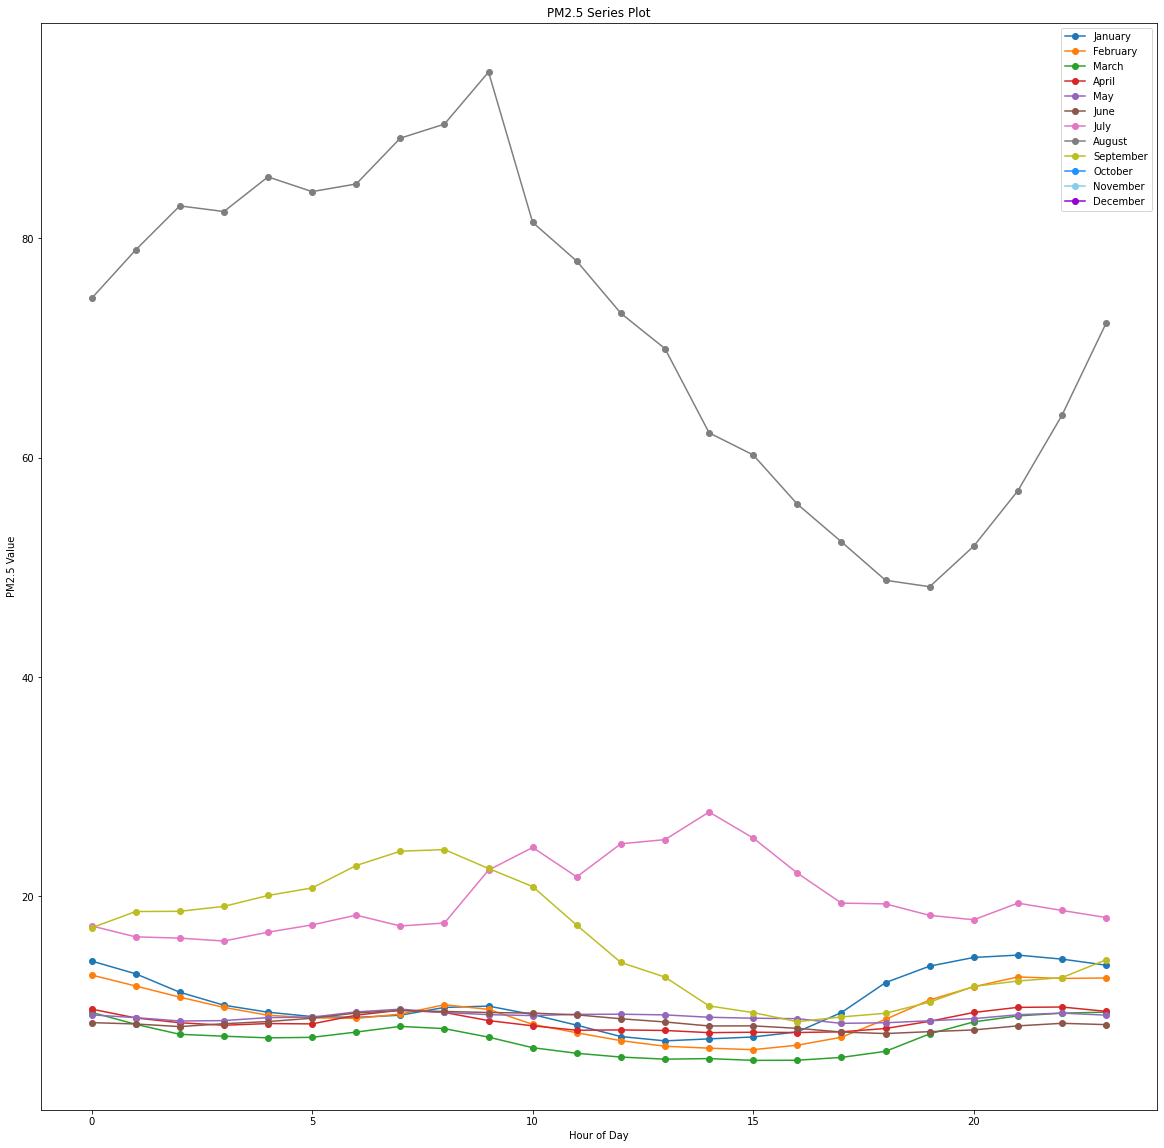

In [ ]:
# Plot all means
plt.rcParams["figure.figsize"] = (20,20)
hour_strs=[]
  
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs.append(hour_str)

plt.plot(all_values_EPA[0], marker='o', label="January")
plt.plot(all_values_EPA[1], marker='o', label="February")
plt.plot(all_values_EPA[2], marker='o', label="March")
plt.plot(all_values_EPA[3], marker='o', label="April")
plt.plot(all_values_EPA[4], marker='o', label="May")
plt.plot(all_values_EPA[5], marker='o', label="June")
plt.plot(all_values_EPA[6], marker='o', label="July")
plt.plot(all_values_EPA[7], marker='o', label="August")
plt.plot(all_values_EPA[8], marker='o', label="September")
plt.plot(all_values_EPA[9], marker='o', color="dodgerblue",label="October")
plt.plot(all_values_EPA[10], marker='o',color= "skyblue", label="November")
plt.plot(all_values_EPA[11], marker='o',color="darkviolet",label="December")
plt.legend()


# Add labels and title to plot
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5 Value")
plt.title("PM2.5 Series Plot")

In [ ]:
  february= california.loc[california["Date Local"].str.contains("2021-02")]
  march= california.loc[california["Date Local"].str.contains("2021-03")]
  april= california.loc[california["Date Local"].str.contains("2021-04")]
  may= california.loc[california["Date Local"].str.contains("2021-05")]
  june= california.loc[california["Date Local"].str.contains("2021-06")]
  july= california.loc[california["Date Local"].str.contains("2021-07")]
  august= california.loc[california["Date Local"].str.contains("2021-08")]
  september= california.loc[california["Date Local"].str.contains("2021-09")]
  october= california.loc[california["Date Local"].str.contains("2021-10")]
  november= california.loc[california["Date Local"].str.contains("2021-11")]
  december= california.loc[california["Date Local"].str.contains("2021-12")]

## Purple Air

In [ ]:
#All Means
directory = '/content/drive/MyDrive/Colab Notebooks/Data/shared_data_LUR/data/purpleair/41860/2021/'

# New dataframes
month_strs = [] # Store months
hour_strs = [] # Store hours
all_hours = []
all_hours_one_month = [] # Store means of hours
all_values=[] # Store mean values for each hour for each month 

# Loop through hours
for hour in range(24):
  hour_str = str(hour)
  if hour < 10:
    hour_str = '0' + str(hour)
  hour_strs.append(hour_str)

# Loop through months
for month in range(13):
  month_str = str(month)
  if month < 10:
    month_str = '0' + str(month)
  month_strs.append(month_str)
month_strs.remove("00")


for filename in os.listdir(directory_):

  station_month_hour = [] # Jan, 12pm

  for month in month_strs:
    all_hours_one_month = [] # Store means of hours
    directory_= directory + month + "/"
    
    for i in hour_strs:
      hour_pm_all_stations=[]
    
      # Read in data and loop through
      f = os.path.join(directory_ + filename)
      data = pd.read_csv(f)

      pm_per_hour = data.loc[data["datetime"].str.contains(i+ ":00:00") ] # Extract rows matching each hour
      col_pm = pm_per_hour[pm_per_hour.columns[-1]] #Take the PM value
      hour_pm_all_stations.append(col_pm.values)
    flatten=np.concatenate(hour_pm_all_stations)
    mean_of_hour=np.nanmean(flatten) # Find the mean of the PM values
    all_hours_one_month.append(mean_of_hour) # Append the mean value to a dataframe
  all_values.append(all_hours_one_month)
print(all_values)
